Baseline RMSE: 0.13
Bootstrap RMSE 95% CI: [0.11, 0.15]


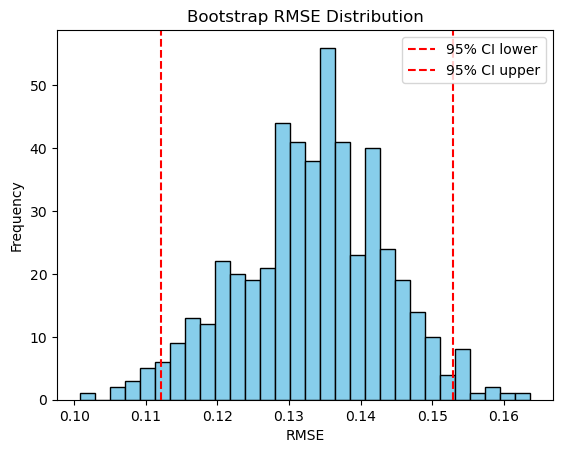

Scenario A (Linear) RMSE: 0.13
Scenario B (Polynomial) RMSE: 0.00


In [7]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error

# -------------------------------
# 2. Baseline Model
# -------------------------------
baseline_model = LinearRegression()
baseline_model.fit(X, y)
y_pred = baseline_model.predict(X)
baseline_rmse = root_mean_squared_error(y, y_pred)  # updated

print(f"Baseline RMSE: {baseline_rmse:.2f}")

# -------------------------------
# 3. Bootstrap CI
# -------------------------------
n_boot = 500
boot_rmse = []

for i in range(n_boot):
    X_res, y_res = resample(X, y, replace=True, random_state=i)
    model = LinearRegression().fit(X_res, y_res)
    y_hat = model.predict(X_res)
    boot_rmse.append(root_mean_squared_error(y_res, y_hat))  # updated

ci_low, ci_high = np.percentile(boot_rmse, [2.5, 97.5])
print(f"Bootstrap RMSE 95% CI: [{ci_low:.2f}, {ci_high:.2f}]")

plt.hist(boot_rmse, bins=30, color="skyblue", edgecolor="k")
plt.axvline(ci_low, color="red", linestyle="--", label="95% CI lower")
plt.axvline(ci_high, color="red", linestyle="--", label="95% CI upper")
plt.title("Bootstrap RMSE Distribution")
plt.xlabel("RMSE")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# -------------------------------
# 4. Scenario Comparison
# -------------------------------
# Scenario A: Linear (baseline)
y_pred_linear = baseline_model.predict(X)
rmse_linear = root_mean_squared_error(y, y_pred_linear)  # updated

# Scenario B: Polynomial regression (degree 2)
poly_pipeline = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", StandardScaler()),
    ("linreg", LinearRegression())
])
poly_pipeline.fit(X, y)
y_pred_poly = poly_pipeline.predict(X)
rmse_poly = root_mean_squared_error(y, y_pred_poly)  # updated

print(f"Scenario A (Linear) RMSE: {rmse_linear:.2f}")
print(f"Scenario B (Polynomial) RMSE: {rmse_poly:.2f}")
